In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

from pose_pipeline.utils.jupyter import play, play_grid
from pose_pipeline.pipeline import *

from multi_camera.datajoint.gaitrite_comparison import *
from multi_camera.datajoint.multi_camera_dj import *
from multi_camera.datajoint.biomechanics import *

pd.set_option('display.max_rows', 500)
dj.config['display.limit'] = 500

[2023-04-26 12:37:31,419][INFO]: Connecting root@127.0.0.1:3306
[2023-04-26 12:37:31,436][INFO]: Connected root@127.0.0.1:3306


In [2]:
import pose_pipeline.pipeline
pose_pipeline.pipeline.schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [ ]:
(GaitRiteCalibration & 'subject_id=606').delete()

In [ ]:
GaitRiteCalibration.populate()
#GaitRiteRecordingAlignment.populate()

GaitRiteSession - GaitRiteCalibration
#GaitRiteCalibration.populate('subject_id=327')

In [ ]:
filt = PersonKeypointReconstructionMethodLookup & 'reconstruction_method_name="RobustTriangulationThresh0.3"'
filt = TopDownMethodLookup #& 'top_down_method_name="MMPoseWholeBody"'
GaitRiteCalibration.populate(filt)
GaitRiteRecordingAlignment.populate(filt)
#PersonKeypointReprojectionQuality.populate(TopDownMethodLookup & 'top_down_method_name="MMPoseWholebody"')
PersonKeypointReprojectionQuality.populate(filt)
GaitRiteRecordingStepPositionError.populate(filt, suppress_errors=True)
GaitRiteRecordingStepLengthError.populate(filt, suppress_errors=True)
GaitRiteRecordingStepWidthError.populate(filt, suppress_errors=True) #'top_down_method=2 and reconstruction_method=2')

MultiCameraRecording & (GaitRiteRecordingAlignment & filt)

In [ ]:
GaitRiteRecordingStepWidthError & 'subject_id=423'

# Basic statistics

In [132]:
#len(GaitRiteSession()), len(np.unique(GaitRiteSession.fetch('subject_id')))
len(GaitRiteRecording())

429

In [133]:
tables = GaitRiteSession & GaitRiteCalibration
x = np.unique(tables.fetch('subject_id'))
x, len(x), len(tables), len(GaitRiteRecording & tables)

(array([104, 108, 123, 129, 134, 136, 137, 138, 139, 141, 142, 144, 146,
        159, 160, 190, 191, 192, 212, 214, 308, 309, 310, 311, 312, 313,
        315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
        328, 401, 404, 418, 423, 503, 504, 601, 602, 603, 604, 605, 606,
        607]),
 53,
 61,
 420)

In [131]:
prosthetic = list(range(100, 199))
stroke = [308, 311, 312, 314, 315, 316, 318, 319, 321, 323, 324, 325, 326, 327, 328, 401, 404, 418, 423]
spine = [313]
fd = [320]
tbi = [309,317]
osteo = [212, 214, 310]
control = list(range(500, 699))

count = lambda c: len([i for i in x if i in c])

print(count(prosthetic), count(stroke), count(tbi), count(osteo), count(fd), count(control))

missing = [i for i in x if i in range(300, 399) and i not in stroke]
missing

18 18 2 3 1 9


[309, 310, 313, 317, 320, 322]

In [135]:
print(len(GaitRiteRecordingStepPositionError.Step & 'top_down_method=2 and reconstruction_method=2'))
steps_per = GaitRiteSession.aggr(GaitRiteRecordingStepPositionError.Step & 'top_down_method=2 and reconstruction_method=2' & tables, n='COUNT(*)')
display(steps_per)
np.min(steps_per.fetch('n')), np.max(steps_per.fetch('n'))

5741


subject_id,gaitrite_sesion_date,n calculated attribute
104,2022-12-08 04:14:22,98
108,2022-11-14 06:07:28,44
123,2023-03-23 05:25:18,98
129,2022-11-10 10:05:02,63
134,2022-11-17 06:10:25,45
136,2022-11-28 05:33:48,50
137,2022-11-30 08:22:54,81
138,2022-12-19 05:38:28,59
139,2022-12-12 05:47:52,89
139,2022-12-16 06:03:18,86


(44, 208)

In [114]:
vid = VideoInfo * SingleCameraVideo * MultiCameraRecording * GaitRiteRecording
len(vid), np.sum(vid.fetch('num_frames'))

(4253, 2786543)

# Make figure showing keypoints and a reconstruction

In [11]:
import datetime
from pose_pipeline.utils.visualization import fetch_frame
from multi_camera.utils.visualization import make_reprojection_video


key = {'subject_id': 309,
 'gaitrite_sesion_date': datetime.datetime(2022, 10, 24, 14, 31, 35),
 'recording_timestamps': datetime.datetime(2022, 10, 24, 14, 31, 43),
 'camera_config_hash': '4ff4ccde96',
 'cal_timestamp': datetime.datetime(2022, 10, 24, 12, 36, 11),
 'reconstruction_method': 2,
 'tracking_method': 21,
 'top_down_method': 2}

In [12]:
keys = (PersonKeypointReconstruction * GaitRiteRecordingAlignment & {'reconstruction_method': 2, 'tracking_method': 21,
                                                                     'top_down_method': 2, 'subject_id': 309}).fetch('KEY')
key = keys[1]

In [13]:
PersonKeypointReconstructionVideo.populate(key)
play(PersonKeypointReconstructionVideo & key)

In [ ]:
video = make_reprojection_video(key, detected_keypoint_size=10, projected_keypoint_size=14)
video

In [ ]:
def plot_data(key, ax, orientation=0, i=0):

    import matplotlib.pyplot as plt

    t_offset = (GaitRiteRecordingAlignment & key).fetch1("t_offset")

    dt, kp3d, df = fetch_data(key)
    R, t = (GaitRiteCalibration & key).fetch1("r", "t")

    if kp3d.shape[-1] == 4:
        conf = kp3d[:, :, 3]
    else:
        conf = np.ones_like(kp3d[:, :, 0])
    if R.shape[0] == 3:
        kp3d = kp3d[:, :, :3] @ R + t
    else:
        print(kp3d.shape, R.shape, t.shape)
        kp3d = kp3d[:, :, :2] @ R + t

    idx = df["Left Foot"]

    def step_plot(df, field, style, size, ax):
        ax.plot(
            df[["First Contact Time", "Last Contact Time"]].T + t_offset,
            np.stack([df[field].values, df[field].values]),
            style,
            markersize=size,
        )

    # only doing left heel
    ax = [ax] * 4
    
    #ax[i].plot(dt, kp3d[:, i, orientation], "k") # if i == 0 else "k--")
    ax[i].plot(dt, kp3d[:, i, orientation], 'r' if i>= 2 else 'b')

    if orientation == 0:
        a = "X"
    elif orientation == 1:
        a = "Y"
    elif orientation == 2:
        a = "Z"

    if orientation < 2:
        if i == 0:
            step_plot(df.loc[idx], f"Heel {a}", "ko-", 2.5, ax[i])  # bo
        elif i == 1: 
            step_plot(df.loc[idx], f"Toe {a}", "ko-", 1.5, ax[i])   # bo
        elif i == 2:
            step_plot(df.loc[~idx], f"Heel {a}", "ko-", 2.5, ax[i]) # ro
        elif i == 3:
            step_plot(df.loc[~idx], f"Toe {a}", "ko-", 1.5, ax[i])  # ro

    if orientation == 0:
        ax[0].set_title("Left Heel Forward")
    elif orientation == 1:
        ax[0].set_title("Left Heel Lateral")
    elif orientation == 2:
        ax[0].set_title("Left Heel Vertical")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Position (mm)")
    plt.tight_layout()
    
    return df, t_offset
    
fig, ax = plt.subplots(3,1,figsize=(8,6),sharex=True)
plot_data(key, ax=ax[0])
#plot_data(key, ax=ax[0], i=2)

plot_data(key, ax=ax[1],orientation=1)
plot_data(key, ax=ax[1],orientation=1, i=2)

plot_data(key, ax=ax[2],orientation=2, i=1)
df, t_offset = plot_data(key, ax=ax[2],orientation=2, i=3)

#ax[0].set_xlim(8,17)
ax[0].set_xlim(df.iloc[0]['First Contact Time'] + t_offset - 1, df.iloc[-1]['Last Contact Time'] + t_offset + 1)
#df

In [ ]:
import cv2
cap = cv2.VideoCapture(video)
cap.set(cv2.CAP_PROP_POS_FRAMES, 690)
res, frame = cap.read()
cap.release()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

frame2 = fetch_frame(PersonKeypointReconstructionVideo & key, 690)
frame2 = frame2[400:1300, 700:1400]

# now lay out the panels
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# create figure and specify the grid layout
fig = plt.figure(figsize=(9,3))
gs = GridSpec(2, 3, width_ratios=[1.3, 0.8, 0.7], wspace=0.0)


# create the first two axes that fill the vertical range and take up 2/3 of the horizontal range
ax1 = fig.add_subplot(gs[:, 0:1])
ax2 = fig.add_subplot(gs[:, 1:2])

# create the second two axes that are stacked on top of each other on the far right
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])


#fig, ax = plt.subplots(1, 3, figsize=(9,6), width_ratios=[1.1, 1, 1])
ax1.imshow(frame)
ax1.axis('off')
ax2.imshow(frame2)
ax2.axis('off')



plot_data(key,ax=ax3)
#plot_data(key,ax=ax3, i=2)
plot_data(key,ax=ax4,orientation=1)
plot_data(key,ax=ax4,orientation=1, i=2)
ax3.set_xlim(16,30)
ax3.set_xlabel('')
ax4.set_xlim(16,30)
ax4.set_ylim(-600, 0)
ax4.set_title('Bilateral Heel Lateral')

sns.despine()
gs.tight_layout(fig)

pos = ax2.get_position()
new_pos = [pos.x0 - 0.05, pos.y0, pos.width, pos.height]
ax2.set_position(new_pos)


fig.savefig('reprojection_reconstruction.png', dpi=300)

# Show the reprojection metrics

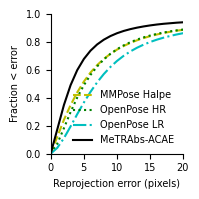

In [16]:
#plt.rcParams['text.usetex'] = True
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def get_average_metrics(filt = 'top_down_method=2 and reconstruction_method=2'):
    res = (PersonKeypointReprojectionQuality * PersonKeypointReconstructionMethodLookup * TopDownMethodLookup & filt).fetch('reprojection_metrics')
    metrics = np.array([m['metrics'] for m in res])
    metrics = np.mean(metrics, axis=0)
    thresh = res[0]['thresh']
    confidence = res[0]['confidence']
    
    return metrics, thresh, confidence

plt.rcParams.update({'font.size': 7})

fig, ax = plt.subplots(1,1,figsize=(2.0, 2.0))
#fig, ax = plt.subplots(1,1,figsize=(6.0, 6.0))
ax = [ax]

idx = [5]   # 0.5 confidence

metrics, thresh, confidence = get_average_metrics(filt = 'top_down_method_name="MMPoseHalpe" and reconstruction_method_name="Robust Triangulation"')
ax[0].plot(thresh, metrics[:, idx], 'y--', label='MMPose Halpe')
#metrics, thresh, confidence = get_average_metrics(filt = 'top_down_method_name="OpenPose" and reconstruction_method_name="Robust Triangulation"')
#ax[0].plot(thresh, metrics[:, idx], 'b--', label='OpenPose')
metrics, thresh, confidence = get_average_metrics(filt = 'top_down_method_name="OpenPose_HR" and reconstruction_method_name="Robust Triangulation"')
ax[0].plot(thresh, metrics[:, idx], 'g:', label='OpenPose HR')
metrics, thresh, confidence = get_average_metrics(filt = 'top_down_method_name="OpenPose_LR" and reconstruction_method_name="Robust Triangulation"')
ax[0].plot(thresh, metrics[:, idx], 'c-.', label='OpenPose LR')
metrics, thresh, confidence = get_average_metrics(filt = 'top_down_method_name="Bridging_COCO_25" and reconstruction_method_name="Robust Triangulation"')
ax[0].plot(thresh, metrics[:, idx], 'k', label='MeTRAbs-ACAE')

ax[0].set_xlim(0, 20)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Fraction < error')
ax[0].set_xlabel('Reprojection error (pixels)')
ax[0].legend(frameon=False)
#ax[0].set_title('A) Robust Triangulation', loc='left')


plt.xlabel('Reprojection error (pixels)')
plt.ylabel('Fraction < error')
plt.ylim(0, 1)
plt.xlim(0, 20)

plt.tight_layout()
sns.despine()

fig.savefig('reprojection_quality.pdf')

### Now run statistics on keypoints

In [17]:
import scipy

tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = tables * GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError

df = pd.DataFrame((tables & 'reconstruction_method_name="Robust Triangulation" and top_down_method_name IN ("OpenPose_LR", "OpenPose_HR", "MMPoseHalpe", "Bridging_COCO_25")').fetch('reprojection_pck_5',  'top_down_method_name', 'video_base_filename', as_dict=True))

display(df.groupby('top_down_method_name')['reprojection_pck_5'].mean())

values_per_group = [col for col_name, col in df.groupby('top_down_method_name')['reprojection_pck_5']]
print(scipy.stats.kruskal(*values_per_group))

print(len(df) // 3)
import scikit_posthocs as sp
sp.posthoc_conover(df, val_col='reprojection_pck_5', group_col='top_down_method_name', p_adjust = 'holm')

top_down_method_name
Bridging_COCO_25    0.678105
MMPoseHalpe         0.531450
OpenPose_HR         0.486762
OpenPose_LR         0.364338
Name: reprojection_pck_5, dtype: float64

KruskalResult(statistic=921.3048748602921, pvalue=2.117389330739607e-199)
506


,Bridging_COCO_25,MMPoseHalpe,OpenPose_HR,OpenPose_LR
Bridging_COCO_25,1.000000e+00,9.942527e-78,1.045270e-134,3.296090e-303
MMPoseHalpe,9.942527e-78,1.000000e+00,5.763445e-15,1.903049e-139
OpenPose_HR,1.045270e-134,5.763445e-15,1.000000e+00,1.826338e-78
OpenPose_LR,3.296090e-303,1.903049e-139,1.826338e-78,1.000000e+00


In [18]:
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = tables * GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError

df = pd.DataFrame((tables & 'reconstruction_method_name IN ("Implicit Optimization", "Robust Triangulation") and top_down_method_name IN ("MMPoseHalpe")').fetch('reprojection_pck_5',  'reconstruction_method', 'video_base_filename', as_dict=True))


In [19]:
import scipy.stats as ss
values_per_group = [col for col_name, col in df.groupby('reconstruction_method')['reprojection_pck_5']]
print(len(values_per_group[0])*2)
ss.ranksums(*values_per_group)

778


RanksumsResult(statistic=-1.9914126782076835, pvalue=0.04643553655538165)

### Statistics on smoothness and skeleton

In [20]:
import scipy

filt = 'top_down_method_name="MMPoseHalpe" and reconstruction_method_name IN ("Implicit Optimization", "Implicit Optimization KP Conf, MaxHuber=10", "Explicit Optimization", "Robust Triangulation", "Explicit Optimization KP Conf, MaxHuber=10")'
df = pd.DataFrame((tables & filt).fetch('smoothness_loss',  'reconstruction_method_name', 'video_base_filename', as_dict=True))
#display(df)

display(df.groupby('reconstruction_method_name')['smoothness_loss'].mean())

values_per_group = [col for col_name, col in df.groupby('reconstruction_method_name')['smoothness_loss']]
print(scipy.stats.kruskal(*values_per_group))

import scikit_posthocs as sp
sp.posthoc_conover(df, val_col='smoothness_loss', group_col='reconstruction_method_name', p_adjust = 'holm')

reconstruction_method_name
Explicit Optimization                         40.245306
Explicit Optimization KP Conf, MaxHuber=10    32.700590
Implicit Optimization                         20.234188
Implicit Optimization KP Conf, MaxHuber=10    19.138351
Robust Triangulation                          94.939716
Name: smoothness_loss, dtype: float64

KruskalResult(statistic=1098.2337627589422, pvalue=1.828199009361359e-236)


,Explicit Optimization,"Explicit Optimization KP Conf, MaxHuber=10",Implicit Optimization,"Implicit Optimization KP Conf, MaxHuber=10",Robust Triangulation
Explicit Optimization,1.000000e+00,9.656659e-12,3.549052e-113,2.160827e-128,7.594572e-57
"Explicit Optimization KP Conf, MaxHuber=10",9.656659e-12,1.000000e+00,4.124461e-62,1.456510e-74,1.651585e-106
Implicit Optimization,3.549052e-113,4.124461e-62,1.000000e+00,6.456192e-02,3.142857e-262
"Implicit Optimization KP Conf, MaxHuber=10",2.160827e-128,1.456510e-74,6.456192e-02,1.000000e+00,7.463729e-280
Robust Triangulation,7.594572e-57,1.651585e-106,3.142857e-262,7.463729e-280,1.000000e+00


In [21]:
filt = 'top_down_method_name="MMPoseHalpe" and reconstruction_method_name IN ("Implicit Optimization", "Implicit Optimization KP Conf, MaxHuber=10", "Explicit Optimization", "Robust Triangulation", "Explicit Optimization KP Conf, MaxHuber=10")'
df = pd.DataFrame((tables & filt).fetch('skeleton_loss',  'reconstruction_method_name', 'video_base_filename', as_dict=True))
#display(df)

display(df.groupby('reconstruction_method_name')['skeleton_loss'].mean())

values_per_group = [col for col_name, col in df.groupby('reconstruction_method_name')['skeleton_loss']]
print(scipy.stats.kruskal(*values_per_group))

import scikit_posthocs as sp
sp.posthoc_conover(df, val_col='skeleton_loss', group_col='reconstruction_method_name', p_adjust = 'holm')

reconstruction_method_name
Explicit Optimization                          31.389406
Explicit Optimization KP Conf, MaxHuber=10      3.168605
Implicit Optimization                           0.428898
Implicit Optimization KP Conf, MaxHuber=10      0.308637
Robust Triangulation                          704.641425
Name: skeleton_loss, dtype: float64

KruskalResult(statistic=1678.741205980447, pvalue=0.0)


,Explicit Optimization,"Explicit Optimization KP Conf, MaxHuber=10",Implicit Optimization,"Implicit Optimization KP Conf, MaxHuber=10",Robust Triangulation
Explicit Optimization,1.000000e+00,2.076606e-98,0.000000e+00,0.000000e+00,4.222881e-96
"Explicit Optimization KP Conf, MaxHuber=10",2.076606e-98,1.000000e+00,4.997868e-235,0.000000e+00,2.123737e-297
Implicit Optimization,0.000000e+00,4.997868e-235,1.000000e+00,2.950174e-23,0.000000e+00
"Implicit Optimization KP Conf, MaxHuber=10",0.000000e+00,0.000000e+00,2.950174e-23,1.000000e+00,0.000000e+00
Robust Triangulation,4.222881e-96,2.123737e-297,0.000000e+00,0.000000e+00,1.000000e+00


### statistics on step width

In [22]:
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError * tables

tables = tables & filt & 'top_down_method_name="MMPoseHalpe" and reconstruction_method_name != "Triangulation"'

df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'mean_step_width_error', 'mean_step_length_error',
                               'mean_forward_heel_error', 'mean_lateral_heel_error', 'mean_forward_toe_error', 'mean_lateral_toe_error',
                               'mean_stride_length_error', as_dict=True))
m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).median()
display(m['mean_step_length_error'])

values_per_group = [col for col_name, col in df.groupby('reconstruction_method_name')['mean_step_length_error']]
print(scipy.stats.kruskal(*values_per_group))

import scikit_posthocs as sp
sp.posthoc_conover(df, val_col='mean_step_length_error', group_col='reconstruction_method_name', p_adjust = 'holm')

top_down_method_name  reconstruction_method_name                
MMPoseHalpe           Explicit Optimization                         12.3242
                      Explicit Optimization KP Conf, MaxHuber=10    10.8563
                      Implicit Optimization                         10.5536
                      Implicit Optimization KP Conf, MaxHuber=10    11.5451
                      Robust Triangulation                          11.6533
Name: mean_step_length_error, dtype: float64

KruskalResult(statistic=17.14080224365614, pvalue=0.0018148980153478884)


,Explicit Optimization,"Explicit Optimization KP Conf, MaxHuber=10",Implicit Optimization,"Implicit Optimization KP Conf, MaxHuber=10",Robust Triangulation
Explicit Optimization,1.000000,0.059264,0.000932,0.349648,0.834336
"Explicit Optimization KP Conf, MaxHuber=10",0.059264,1.000000,0.834336,0.896533,0.834336
Implicit Optimization,0.000932,0.834336,1.000000,0.349648,0.079942
"Implicit Optimization KP Conf, MaxHuber=10",0.349648,0.896533,0.349648,1.000000,0.896533
Robust Triangulation,0.834336,0.834336,0.079942,0.896533,1.000000


# Plot histogram for step width and length errors

5121 -13.116246248322593 19.058577537719195 15.2 22.991777742141576 [43.76994]
4543 -0.33392616757869253 -0.856609 14.721540024184458 9.40036 26.154488901095103 [13.90542771]
4536 -8.989749426123236 -8.992045000000001 11.08947437975463 9.691984999999999 10.946330891256556 [8.74334439]
-8.989749426123236


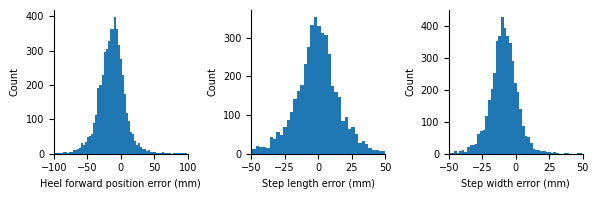

In [52]:
fig, ax = plt.subplots(1,3,figsize=(6,2))


d = (GaitRiteRecordingStepPositionError.Step * PersonKeypointReconstructionMethodLookup & 'top_down_method=2 and reconstruction_method_name="Implicit Optimization" and heel_conf > 0.5 and subject_id != 192').fetch('heel_forward_error')
print(len(d), np.mean(d), np.mean(np.abs(d)), np.median(np.abs(d)), np.std(d), np.diff(np.percentile(d, [10, 90])))

ax[0].hist(d, np.linspace(-150, 150, 100));
ax[0].set_xlabel('Heel forward position error (mm)')
ax[0].set_ylabel('Count')
ax[0].set_xlim(-100, 100)


d = (GaitRiteRecordingStepLengthError.Step * PersonKeypointReconstructionMethodLookup & 'top_down_method=2 and reconstruction_method_name="Implicit Optimization"').fetch('step_length_error')
#d = (GaitRiteRecordingStepPositionError.Step * GaitRiteRecordingStepLengthError.Step * PersonKeypointReconstructionMethodLookup & 'top_down_method=2 and reconstruction_method_name="Robust Triangulation" and heel_conf > 0.5').fetch('step_length_error')
print(len(d), np.mean(d), np.median(d), np.mean(np.abs(d)), np.median(np.abs(d)), np.std(d), np.diff(np.percentile(d, [25, 75])) * 0.7413)

bins = ax[1].hist(d, 300);
ax[1].set_xlabel('Step length error (mm)')
ax[1].set_ylabel('Count')
ax[1].set_xlim(-50, 50)


d = (GaitRiteRecordingStepPositionError.Step * GaitRiteRecordingStepWidthError.Step * PersonKeypointReconstructionMethodLookup & 'top_down_method=2 and reconstruction_method_name="Implicit Optimization"').fetch('step_width_error')
#d = (GaitRiteRecordingStepPositionError.Step * GaitRiteRecordingStepWidthError.Step * PersonKeypointReconstructionMethodLookup & 'top_down_method=2 and reconstruction_method_name="Robust Triangulation" and heel_conf > 0.5').fetch('step_width_error')
print(len(d), np.mean(d), np.median(d), np.mean(np.abs(d)), np.median(np.abs(d)), np.std(d), np.diff(np.percentile(d, [25, 75])) * 0.7413 )

ax[2].hist(d, 150);
ax[2].set_xlabel('Step width error (mm)')
ax[2].set_ylabel('Count')
ax[2].set_xlim(-50, 50)
print(np.mean(d))
#d = d - np.mean(d)


sns.despine()
plt.tight_layout()


fig.savefig('step_spatial_error.pdf')


(0.0, 200.0)

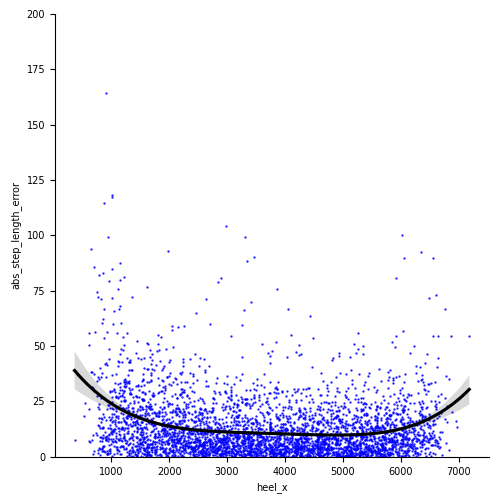

In [53]:
#GaitRiteRecordingStepError.populate(suppress_errors=True)

tables = GaitRiteRecordingStepPositionError.Step * GaitRiteRecordingStepWidthError.Step * GaitRiteRecordingStepLengthError.Step
tables = tables * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
steps = pd.DataFrame((tables  & 'top_down_method=2 and reconstruction_method_name="Implicit Optimization"').fetch(as_dict=True))
#steps['log_heel_error'] = np.log10(steps['heel_forward_error'])
steps['abs_step_length_error'] = np.abs(steps['step_length_error'] - 1*np.mean(steps['step_length_error']))

sns.lmplot(data=steps.loc[steps['heel_conf'] > 0.5], x='heel_x', y='abs_step_length_error',
           order=4, ci=95, scatter_kws={"s": 0.5, "color": "b"}, line_kws={"color": "k"}, scatter=True)

plt.ylim(0, 200)

In [25]:
tables = GaitRiteRecordingStepPositionError.Step * GaitRiteRecordingStepWidthError.Step * GaitRiteRecordingStepLengthError.Step
combinations = TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
bias = combinations.aggr(tables, step_width_bias='AVG(step_width_error)')
combinations * combinations.aggr(tables * bias, x='AVG(ABS(step_width_error-step_width_bias))') & 'top_down_method_name="MMPoseHalpe"'


top_down_method,reconstruction_method,top_down_method_name,reconstruction_method_name,x calculated attribute
2,0,MMPoseHalpe,Robust Triangulation,8.08593110866726
2,1,MMPoseHalpe,"Explicit Optimization KP Conf, MaxHuber=10",9.71074932765042
2,2,MMPoseHalpe,"Implicit Optimization KP Conf, MaxHuber=10",8.459925179716631
2,3,MMPoseHalpe,Implicit Optimization,7.741153183802957
2,4,MMPoseHalpe,Triangulation,10.705400526599641
2,5,MMPoseHalpe,Robust Triangulation $\sigma=100$,7.896222797118278
2,6,MMPoseHalpe,Robust Triangulation $\sigma=50$,7.871107659061357
2,7,MMPoseHalpe,Explicit Optimization,9.113283791727708
2,8,MMPoseHalpe,Robust Triangulation $\gamma=0.3$,8.28690701979899
2,9,MMPoseHalpe,Implicit Optimization KP Conf,8.232777074683685


# Code to format pretty final charts for manuscript

In [36]:
column_mapping = {'mean_forward_heel_error': 'Heel Forward',
                  'mean_lateral_heel_error': 'Heel Lateral',
                  'mean_forward_toe_error': 'Toe Forward',
                  'mean_lateral_toe_error': 'Toe Lateral',
                  'mean_step_length_error': 'Step Length',
                  'mean_stride_length_error': 'Stride Length',
                  'mean_step_width_error': 'Step Width',
                  'reprojection_loss': '$\mathcal L_\Pi$',
                  'skeleton_loss': '$\mathcal L_{\mathrm{skeleton}}$',
                  'smoothness_loss': '$\mathcal L_{\mathrm{smooth}}$',
                  'reprojection_pck_5': '$GC_5$',
                  'reprojection_pck_10': '$GC_{10}$',
                  'reprojection_pck_20': '$GC_{20}$',
                  'reprojection_pck_100': '$GC_{100}$',
                  'top_down_method_name': 'Keypoints',
                  'reconstruction_method_name': 'Method',
                  'heel_forward_error': 'Heel Forward',
                  'heel_lateral_error': 'Heel Lateral',
                  'toe_forward_error': 'Toe Forward',
                  'toe_lateral_error': 'Toe Lateral',
                  'step_length_error': 'Step Length',
                  'stride_length_error': 'Stride Length',
                  'step_width_error': 'Step Width',
                  "OpenPose_HR": "OpenPose HR",
                  "OpenPose_LR": "OpenPose LR",
                  "Explicit Optimization KP Conf, MaxHuber=10": r"Explicit Optimization$\dagger$",
                  "Implicit Optimization KP Conf, MaxHuber=10": r"Implicit Optimization$\dagger$",
                 }
 
def column_remapper(df, column_mapping):
    new_columns = [column_mapping[k]  if k in column_mapping.keys() else k for k in df.columns]
    df = df.copy()
    df.columns = new_columns
    
    index_names = [column_mapping[k]  if k in column_mapping.keys() else k for k in df.index.names]
    df.index.names = index_names
    
    index = [(m, column_mapping[k]) if k in column_mapping.keys() else (m, k) for m, k in df.index.values]
    df.index = pd.MultiIndex.from_tuples(index, names=index_names)
    
    return df

def order_standard(df):
    return df.loc[
        [#('Bridging_COCO_25', 'Implicit Optimization KP Conf, MaxHuber=10'),
         ('Bridging_COCO_25', 'Implicit Optimization'),
         ('Bridging_COCO_25', "Explicit Optimization"),
         ('Bridging_COCO_25',  'Robust Triangulation'),
         ('MMPoseHalpe', 'Implicit Optimization'),
         #('MMPoseHalpe', 'Implicit Optimization KP Conf, MaxHuber=10'),
         ('MMPoseHalpe', "Explicit Optimization"),
         #('MMPoseHalpe', "Explicit Optimization KP Conf, MaxHuber=10"),
         ('MMPoseHalpe',  'Robust Triangulation'),
         ('OpenPose_LR', 'Implicit Optimization'),
         ('OpenPose_LR' , 'Explicit Optimization'),
         ('OpenPose_LR',  'Robust Triangulation'),
         #('OpenPose', 'Implicit Optimization'),
         #('OpenPose' , 'Explicit Optimization'),
         #('OpenPose',  'Robust Triangulation'),
         #('OpenPose_HR', 'Implicit Optimization KP Conf, MaxHuber=10'),
         ('OpenPose_HR', 'Implicit Optimization'),
         ('OpenPose_HR' , 'Explicit Optimization'),
         ('OpenPose_HR',  'Robust Triangulation')      
        ]]

def bold_extreme_values(data, format_string="%.2f", max_=True):
    print(data)
    if max_:
        extrema = data != data.max()
    else:
        extrema = data != data.min()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 

def format_best_performing(df):
    
    col_show_max = { '$GC_5$': True }
    for col in df.columns.get_level_values(0).unique():
        if col in col_show_max.keys():
            print(col)
            f = lambda data : bold_extreme_values(data, max_=col_show_max[col])
            df[col] = df[col].apply(f)
        else:
            print(1, col)

    return df

def highlight_max(x):
    return ['font-weight: bold' if v == x.loc[4] else '' for v in x]

#m.style.apply(highlight_max, subset='$GC_5$')

#type(m.style.highlight_max(subset='$GC_5$', color = 'lightgreen', axis = 0)) # .highlight_max(subset='$GC_10$', color = 'lightgreen', axis = 0)
#print(m.style.highlight_min(props='font-weight: bold', axis = 0).to_latex(convert_css=True))

#print(format_best_performing(m).to_latex(escape=False))

# Reaggregate statistics from individual steps

In [122]:
##### MAIN DATA TABLE #####

from multi_camera.datajoint.gaitrite_comparison import *

filt = 'top_down_method_name != "MMPoseWholebody2"' # and subject_id>=200'
#filt = filt + ' and heel_noise < 1000 and toe_noise < 1000 and heel_conf > 0.2 and toe_conf > 0.2'
filt = filt #+ ' and recording_timestamps < "2023-02-01"'
filt =  (GaitRiteCalibration & 'score < 60')

# first get step position statistics, which are more plentiful than the relative statistics
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables1 = GaitRiteRecordingStepPositionError.Step * tables & filt

df0 = pd.DataFrame((tables & filt).fetch('reconstruction_method_name', 'top_down_method_name', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 'smoothness_loss', as_dict=True))

df1 = pd.DataFrame(tables1.fetch('reconstruction_method_name', 'top_down_method_name', 
                                  'heel_forward_error', 'heel_lateral_error', 'toe_forward_error', 'toe_lateral_error', as_dict=True))
#display(df1.groupby(['top_down_method_name', 'reconstruction_method_name'])[["heel_forward_error"]].agg('count'))


tables2 = GaitRiteRecordingStepLengthError.Step * GaitRiteRecordingStepWidthError.Step * tables & filt

df2 = pd.DataFrame(tables2.fetch('reconstruction_method_name', 'top_down_method_name', 'step_width_error', 'step_length_error', 'stride_length_error',
                                 as_dict=True))
#display(df2.groupby(['top_down_method_name', 'reconstruction_method_name'])[["step_width_error"]].agg('count'))

def combined(df1, df2, x = 'mean'):
    df1 = df1.groupby(['top_down_method_name', 'reconstruction_method_name']).agg(x)
    df2 = df2.groupby(['top_down_method_name', 'reconstruction_method_name']).agg(x)    
    df = pd.concat([df1, df2], axis=1)
    return df

m = combined(df1, df2, 'std')
#m = combined(df1, df2, lambda x: np.sqrt(np.mean(x**2)))  # RMSE
#m = combined(df1, df2, lambda x: np.median(np.abs(x)))
#m = combined(df1, df2, lambda x: np.median(np.abs(x - np.median(x))))
#m = combined(df1, df2, lambda x: 0.7413 * float(np.diff(np.percentile(x, [25, 75])))) # NIQR
m = combined(df1, df2, lambda x: 1.4826 * np.median(np.abs(x)))
#m = combined(df1, df2, np.median)
#m = combined(df1, df2, lambda x: np.mean(np.abs(x) < 10.0) * 100)
m = pd.concat([df0.groupby(['top_down_method_name', 'reconstruction_method_name']).median(), m], axis=1)


m = order_standard(m)
m = column_remapper(m, column_mapping)
styled = m.style.format(precision=1, subset=['Heel Forward', 'Heel Lateral', 'Toe Forward', 'Toe Lateral', 'Step Length', 'Stride Length', 'Step Width', '$\mathcal L_\Pi$', '$\mathcal L_{\mathrm{skeleton}}$', '$\mathcal L_{\mathrm{smooth}}$']) \
          .highlight_min(props='font-weight: bold', axis = 0, subset=['$\mathcal L_\Pi$', '$\mathcal L_{\mathrm{skeleton}}$', '$\mathcal L_{\mathrm{smooth}}$', 'Heel Forward', 'Heel Lateral', 'Toe Forward', 'Toe Lateral', 'Step Length', 'Stride Length', 'Step Width']) \
          .highlight_max(props='font-weight: bold', axis = 0, subset=['$GC_5$', '$GC_{10}$', '$GC_{20}$']) \
          .format(precision=2, subset=['$GC_5$', '$GC_{10}$', '$GC_{20}$']) \
          #.set_table_styles([dict(selector="th",props=[('max-width', '150px')]),
          #                   dict(selector="table",props=[('width','50vw')])
          #                  ]) \


display(styled)
print(styled.to_latex(hrules=True, convert_css=True))
#m

\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 &  & $GC_5$ & $GC_{10}$ & $GC_{20}$ & $\mathcal L_\Pi$ & $\mathcal L_{\mathrm{skeleton}}$ & $\mathcal L_{\mathrm{smooth}}$ & Heel Forward & Heel Lateral & Toe Forward & Toe Lateral & Step Length & Stride Length & Step Width \\
Keypoints & Method &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{3}{*}{Bridging_COCO_25} & Implicit Optimization & 0.68 & 0.87 & 0.95 & 10.2 & 27.4 & \bfseries 19.2 & 25.6 & 10.1 & 17.9 & \bfseries 10.7 & 15.7 & 12.0 & \bfseries 11.5 \\
 & Explicit Optimization & 0.65 & 0.86 & 0.95 & 11.1 & 33.8 & 29.8 & 23.4 & 10.1 & 18.0 & 11.0 & 15.0 & 11.4 & 11.7 \\
 & Robust Triangulation & \bfseries 0.69 & \bfseries 0.88 & \bfseries 0.95 & \bfseries 9.4 & 82.9 & 26.9 & \bfseries 18.3 & \bfseries 9.4 & 17.7 & 11.0 & 15.0 & 10.5 & 11.6 \\
\multirow[c]{3}{*}{MMPoseHalpe} & Implicit Optimization & 0.55 & 0.77 & 0.90 & 9.5 & \bfseries 0.3 & 19.8 & 22.8 & 10.6 & \bfseries 15.0 & 16.3 & \bfseries 13.5 & \bfseries 10.3 & 

In [123]:
# unfiltered list for appendix, also reports RMSE

from multi_camera.datajoint.gaitrite_comparison import *

#filt = 'top_down_method_name != "MMPoseWholebody"'
filt = 'top_down_method_name != "MMPoseWholebody" and top_down_method_name != "Bridging_bml_movi_87"'
#filt2 = 'heel_noise < 1000 and toe_noise < 1000 and heel_conf > 0.2 and toe_conf > 0.2'

df0 = pd.DataFrame((tables & filt).fetch('reconstruction_method_name', 'top_down_method_name', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 'smoothness_loss', as_dict=True))

# first get step position statistics, which are more plentiful than the relative statistics
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup #& GaitRiteRecording
tables1 = GaitRiteRecordingStepPositionError.Step * tables & filt #& filt2

df1 = pd.DataFrame(tables1.fetch('reconstruction_method_name', 'top_down_method_name', 
                                  'heel_forward_error', 'heel_lateral_error', 'toe_forward_error', 'toe_lateral_error', as_dict=True))

tables2 = GaitRiteRecordingStepLengthError.Step * GaitRiteRecordingStepWidthError.Step * tables & filt

df2 = pd.DataFrame(tables2.fetch('reconstruction_method_name', 'top_down_method_name', 'step_width_error', 'step_length_error', 'stride_length_error',
                                 as_dict=True))

def combined(df1, df2, x = 'mean'):
    df1 = df1.copy().groupby(['top_down_method_name', 'reconstruction_method_name']).agg(x)
    df2 = df2.copy().groupby(['top_down_method_name', 'reconstruction_method_name']).agg(x)    
    df = pd.concat([df1, df2], axis=1)
    return df

def get_version(df1, df2, agg_func, df0=None, highlight=True):

    m = combined(df1, df2, agg_func)
    
    if df0 is not None:
        m = pd.concat([df0.groupby(['top_down_method_name', 'reconstruction_method_name']).mean(), m], axis=1)

    column_mapping2 = column_mapping.copy()
    column_mapping2.pop('Explicit Optimization KP Conf, MaxHuber=10')
    column_mapping2.pop('Implicit Optimization KP Conf, MaxHuber=10')    
    m = column_remapper(m, column_mapping2)

    styled = m.style.format(precision=1, subset=['Heel Forward', 'Heel Lateral', 'Toe Forward', 'Toe Lateral', 'Step Length', 'Stride Length', 'Step Width'])
    if highlight:
        styled = styled.highlight_min(props='font-weight: bold', axis = 0, subset=['Heel Lateral', 'Toe Forward', 'Toe Lateral', 'Step Length', 'Stride Length', 'Step Width']) \
    
    if df0 is not None:
        styled = styled.format(precision=2, subset=['$\mathcal L_\Pi$', '$\mathcal L_{\mathrm{skeleton}}$', '$\mathcal L_{\mathrm{smooth}}$', '$GC_5$', '$GC_{10}$', '$GC_{20}$']) \
                       .highlight_min(props='font-weight: bold', axis = 0, subset=['$\mathcal L_\Pi$', '$\mathcal L_{\mathrm{skeleton}}$', '$\mathcal L_{\mathrm{smooth}}$']) \
                       .highlight_max(props='font-weight: bold', axis = 0, subset=['$GC_5$', '$GC_{10}$', '$GC_{20}$'])
    return styled
    
display(get_version(df1, df2, lambda x: np.sqrt(np.mean(x**2)), highlight=True))   # 'std'


In [126]:
print('full')
styled = get_version(df1, df2, lambda x: 0.7413 * float(np.diff(np.percentile(x, [25, 75]))), df0)
display(styled)
print(styled.to_latex(hrules=True, convert_css=True))

print('MAE')
styled = get_version(df1, df2, lambda x: np.median(np.abs(x)), highlight=True)
display(styled)
print(styled.to_latex(hrules=True, convert_css=True))


print('mean')
styled = get_version(df1, df2, 'mean', highlight=False)
display(styled)
print(styled.to_latex(hrules=True, convert_css=True))

print('rmse')
styled = get_version(df1, df2,  lambda x: np.sqrt(np.mean(x**2))) #'std')
display(styled)
print(styled.to_latex(hrules=True, convert_css=True))


full


\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
 &  & $GC_5$ & $GC_{10}$ & $GC_{20}$ & $\mathcal L_\Pi$ & $\mathcal L_{\mathrm{skeleton}}$ & $\mathcal L_{\mathrm{smooth}}$ & Heel Forward & Heel Lateral & Toe Forward & Toe Lateral & Step Length & Stride Length & Step Width \\
Keypoints & Method &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{13}{*}{Bridging_COCO_25} & Explicit Optimization & 0.64 & 0.85 & 0.93 & 12.76 & 41.88 & 33.68 & 23.3 & 10.1 & 15.8 & 10.8 & 14.8 & 11.4 & 10.5 \\
 & Explicit Optimization KP Conf, MaxHuber=10 & 0.56 & 0.74 & 0.88 & 16.20 & 5.48 & 23.48 & 57.8 & 16.8 & 16.4 & 10.4 & 86.0 & 21.2 & 16.4 \\
 & Implicit Optimization & 0.67 & 0.85 & 0.93 & 2130012.87 & 31.69 & 20.07 & 24.4 & 10.1 & 15.2 & 10.5 & 15.8 & 11.7 & 10.6 \\
 & Implicit Optimization $\gamma=0.3$ & 0.64 & 0.85 & 0.93 & 12.73 & 41.65 & 33.43 & 23.2 & 10.2 & 15.6 & 10.8 & 15.2 & 11.4 & 10.5 \\
 & Implicit Optimization $\sigma=50$ & 0.63 & 0.82 & 0.89 & 17.83 & 98.72 & 64.59 & 27.4 & 11.9 &

\begin{tabular}{llrrrrrrr}
\toprule
 &  & Heel Forward & Heel Lateral & Toe Forward & Toe Lateral & Step Length & Stride Length & Step Width \\
Keypoints & Method &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{13}{*}{Bridging_COCO_25} & Explicit Optimization & 15.8 & 6.8 & 12.2 & 7.4 & 10.1 & 7.7 & 7.9 \\
 & Explicit Optimization KP Conf, MaxHuber=10 & 49.4 & 11.3 & 12.6 & 7.0 & 58.0 & 14.2 & 12.1 \\
 & Implicit Optimization & 17.3 & 6.8 & 12.1 & 7.2 & 10.6 & 8.1 & 7.7 \\
 & Implicit Optimization $\gamma=0.3$ & 15.8 & 6.8 & 12.2 & 7.4 & 10.1 & 7.8 & 7.9 \\
 & Implicit Optimization $\sigma=50$ & 18.5 & 7.8 & 14.6 & 8.2 & 10.2 & 7.8 & 7.8 \\
 & Implicit Optimization KP Conf & 15.4 & 7.0 & 12.3 & \bfseries 6.9 & 10.7 & 7.9 & 7.6 \\
 & Implicit Optimization KP Conf, MaxHuber=10 & 50.6 & 11.7 & 13.1 & 7.1 & 55.1 & 15.7 & 13.7 \\
 & Implicit Optimization, MaxHuber=10 & 49.5 & 11.5 & 13.4 & 7.3 & 50.2 & 15.5 & 14.7 \\
 & Robust Triangulation & 12.3 & 6.4 & 12.0 & 7.4 & 10.1 & 7.1 & 7.8 \\
 & R

\begin{tabular}{llrrrrrrr}
\toprule
 &  & Heel Forward & Heel Lateral & Toe Forward & Toe Lateral & Step Length & Stride Length & Step Width \\
Keypoints & Method &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{13}{*}{Bridging_COCO_25} & Explicit Optimization & 5.3 & 5.7 & 5.6 & 1.8 & -1.5 & -4.8 & -3.7 \\
 & Explicit Optimization KP Conf, MaxHuber=10 & 51.1 & 2.2 & 7.8 & -1.0 & -1.9 & -5.8 & -6.8 \\
 & Implicit Optimization & 13.6 & 0.6 & 9.5 & -1.3 & -1.2 & -4.0 & -3.8 \\
 & Implicit Optimization $\gamma=0.3$ & 5.0 & 5.7 & 5.3 & 2.1 & -1.4 & -4.8 & -3.7 \\
 & Implicit Optimization $\sigma=50$ & -14.2 & 24.4 & -19.1 & 20.6 & 2.9 & -9.9 & 5.4 \\
 & Implicit Optimization KP Conf & 8.1 & 1.2 & 9.8 & -1.1 & -1.1 & -4.0 & -3.9 \\
 & Implicit Optimization KP Conf, MaxHuber=10 & 52.9 & 2.4 & 10.4 & -1.1 & -2.5 & -7.6 & -7.9 \\
 & Implicit Optimization, MaxHuber=10 & 51.8 & 0.1 & 11.0 & -1.6 & -2.2 & -7.0 & -8.0 \\
 & Robust Triangulation & -8.4 & 2.2 & 9.8 & -1.3 & -0.3 & -1.1 & -4.6 \\
 & Rob

\begin{tabular}{llrrrrrrr}
\toprule
 &  & Heel Forward & Heel Lateral & Toe Forward & Toe Lateral & Step Length & Stride Length & Step Width \\
Keypoints & Method &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{13}{*}{Bridging_COCO_25} & Explicit Optimization & 68.3 & 46.1 & 62.1 & 40.1 & 23.0 & 26.2 & 16.5 \\
 & Explicit Optimization KP Conf, MaxHuber=10 & 75.4 & 18.2 & 25.9 & 11.8 & 73.8 & 36.0 & 20.4 \\
 & Implicit Optimization & 36.6 & 13.1 & 28.1 & 13.8 & 22.9 & 21.4 & 12.7 \\
 & Implicit Optimization $\gamma=0.3$ & 66.0 & 47.0 & 64.6 & 42.0 & 23.3 & 26.4 & 16.4 \\
 & Implicit Optimization $\sigma=50$ & 192.6 & 125.2 & 215.7 & 116.7 & 86.0 & 94.6 & 75.8 \\
 & Implicit Optimization KP Conf & 34.2 & \bfseries 11.9 & 28.2 & \bfseries 11.8 & 23.4 & 21.6 & \bfseries 12.1 \\
 & Implicit Optimization KP Conf, MaxHuber=10 & 80.4 & 19.0 & 80.0 & 16.8 & 68.8 & 38.1 & 22.3 \\
 & Implicit Optimization, MaxHuber=10 & 76.4 & 18.9 & 78.2 & 15.7 & 64.5 & 37.8 & 24.0 \\
 & Robust Triangulation & 85.

# Other ways to create data tables

Only uses the aggregated statistics per-trial but much quicker

In [72]:
len(GaitRiteRecording * MultiCameraRecording - PersonKeypointReconstruction)
GaitRiteRecording * MultiCameraRecording - PersonKeypointReconstruction

subject_id,gaitrite_sesion_date,recording_timestamps,camera_config_hash,gaitrite_filename,gaitrite_dataframe,gaitrite_t0,video_project,video_base_filename
141,2023-04-26 15:27:09,2023-04-26 15:28:18,4ff4ccde96,p141_20230426_152818,=BLOB=,2023-04-26 15:28:18,PROSTHETIC_GAIT,p141_ss_20230426_152818
328,2023-04-26 14:12:53,2023-04-26 14:15:17,4ff4ccde96,p328_20230426_141517,=BLOB=,2023-04-26 14:15:17,FES,p328_brace_20230426_141517
606,2023-04-26 15:58:39,2023-04-26 15:58:47,4ff4ccde96,p606_20230426_155839,=BLOB=,2023-04-26 15:58:39,GAIT_CONTROL,p606_ss_20230426_155847
606,2023-04-26 15:58:39,2023-04-26 16:01:48,4ff4ccde96,p606_20230426_160148,=BLOB=,2023-04-26 16:01:48,GAIT_CONTROL,p606_slow_20230426_160148


In [80]:
len(GaitRiteRecording * MultiCameraRecording - PersonKeypointReconstruction)
GaitRiteRecording * MultiCameraRecording - PersonKeypointReconstruction

subject_id,gaitrite_sesion_date,recording_timestamps,camera_config_hash,gaitrite_filename,gaitrite_dataframe,gaitrite_t0,video_project,video_base_filename
608,2023-04-28 14:44:57,2023-04-28 14:44:58,4ff4ccde96,p608_20230428_144457,=BLOB=,2023-04-28 14:44:57,GAIT_CONTROL,p608_20230428_144458
608,2023-04-28 14:44:57,2023-04-28 14:46:02,4ff4ccde96,p608_20230428_144602,=BLOB=,2023-04-28 14:46:02,GAIT_CONTROL,p608_ss_20230428_144602
608,2023-04-28 14:44:57,2023-04-28 14:46:26,4ff4ccde96,p608_20230428_144623,=BLOB=,2023-04-28 14:46:23,GAIT_CONTROL,p608_ss_20230428_144626
608,2023-04-28 14:44:57,2023-04-28 14:46:56,4ff4ccde96,p608_20230428_144656,=BLOB=,2023-04-28 14:46:56,GAIT_CONTROL,p608_fast_20230428_144656
608,2023-04-28 14:44:57,2023-04-28 14:47:19,4ff4ccde96,p608_20230428_144714,=BLOB=,2023-04-28 14:47:14,GAIT_CONTROL,p608_fast_20230428_144719
608,2023-04-28 14:44:57,2023-04-28 14:47:50,4ff4ccde96,p608_20230428_144750,=BLOB=,2023-04-28 14:47:50,GAIT_CONTROL,p608_fast_20230428_144750
608,2023-04-28 14:44:57,2023-04-28 14:48:17,4ff4ccde96,p608_20230428_144816,=BLOB=,2023-04-28 14:48:16,GAIT_CONTROL,p608_slow_20230428_144817
608,2023-04-28 14:44:57,2023-04-28 14:48:44,4ff4ccde96,p608_20230428_144844,=BLOB=,2023-04-28 14:48:44,GAIT_CONTROL,p608_slow_20230428_144844
608,2023-04-28 14:44:57,2023-04-28 14:49:57,4ff4ccde96,p608_20230428_144956,=BLOB=,2023-04-28 14:49:56,GAIT_CONTROL,p608_slow_20230428_144957


In [115]:
from multi_camera.datajoint.gaitrite_comparison import *

tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
#tables = tables * GaitRiteRecordingStepPositionError # * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError
tables = tables & GaitRiteRecording.proj()


df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_pck_100', 'reprojection_loss', 'skeleton_loss', 
                               'smoothness_loss', as_dict=True))
#print(df.groupby(['reconstruction_method_name', 'top_down_method_name']).median().to_markdown())

m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).median()
#print([m[1] for m in m.index])

m['Count'] = df.groupby(['top_down_method_name', 'reconstruction_method_name'])[["reprojection_pck_5"]].agg('count')
#m = m.reindex(sorted(m.columns), axis=1)
m = m.sort_index()
display(m)
#print(df.groupby(['top_down_method_name', 'reconstruction_method_name']).median().to_latex(float_format="%.2f",


reprojection_pck_5  \
top_down_method_name reconstruction_method_name                                       
Bridging_COCO_25     Explicit Optimization                                 0.649013   
                     Explicit Optimization KP Conf, MaxHuber=10            0.565147   
                     Implicit Optimization                                 0.683095   
                     Implicit Optimization $\gamma=0.3$                    0.648417   
                     Implicit Optimization $\sigma=50$                     0.644915   
                     Implicit Optimization KP Conf                         0.709849   
                     Implicit Optimization KP Conf, MaxHuber=10            0.626096   
                     Implicit Optimization, MaxHuber=10                    0.605388   
                     Robust Triangulation                                  0.692858   
                     Robust Triangulation $\gamma=0.3$                     0.692858   
                     Robust Triangulation $\sigma=100$                     0.700779   
                     Robust Triangulation $\sigma=50$                      0.715290   
                     Triangulation                                         0.638050   
Bridging_bml_movi_87 Explicit Optimization                                 0.673200   
                     Explicit Optimization KP Conf, MaxHuber=10            0.682999   
                     Implicit Optimization                                 0.679450   
                     Implicit Optimization $\gamma=0.3$                    0.673336   
                     Implicit Optimization $\sigma=50$                     0.670603   
                     Implicit Optimization KP Conf                         0.697694   
                     Implicit Optimization KP Conf, MaxHuber=10            0.699864   
                     Implicit Optimization, MaxHuber=10                    0.678244   
                     Robust Triangulation                                  0.674685   
                     Robust Triangulation $\gamma=0.3$                     0.674491   
                     Robust Triangulation $\sigma=100$                     0.683792   
                     Robust Triangulation $\sigma=50$                      0.697180   
                     Triangulation                                         0.617979   
MMPoseHalpe          Explicit Optimization                                 0.551577   
                     Explicit Optimization KP Conf, MaxHuber=10            0.586825   
                     Implicit Optimization                                 0.549613   
                     Implicit Optimization $\gamma=0.3$                    0.534671   
                     Implicit Optimization $\sigma=50$                     0.450504   
                     Implicit Optimization KP Conf                         0.569769   
                     Implicit Optimization KP Conf, MaxHuber=10            0.593152   
                     Implicit Optimization, MaxHuber=10                    0.561854   
                     Robust Triangulation                                  0.540515   
                     Robust Triangulation $\gamma=0.3$                     0.524695   
                     Robust Triangulation $\sigma=100$                     0.557343   
                     Robust Triangulation $\sigma=50$                      0.579032   
                     Triangulation                                         0.507530   
OpenPose_HR          Explicit Optimization                                 0.471173   
                     Explicit Optimization KP Conf, MaxHuber=10            0.415290   
                     Implicit Optimization                                 0.494300   
                     Implicit Optimization $\gamma=0.3$                    0.465608   
                     Implicit Optimization $\sigma=50$                     0.435308   
                     Implicit Optimization KP Conf             

In [116]:
from multi_camera.datajoint.gaitrite_comparison import *

tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError * tables
tables = tables & GaitRiteRecording.proj()

#tables = tables & (GaitRiteCalibration & 'score < 60')

df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'mean_step_width_error', 'mean_step_length_error', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 
                               'smoothness_loss', 'mean_forward_heel_error', 'mean_lateral_heel_error', 'mean_forward_toe_error', 'mean_lateral_toe_error',
                               'mean_stride_length_error', as_dict=True))
m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).mean()

m['Count'] = df.groupby(['top_down_method_name', 'reconstruction_method_name'])[["mean_step_width_error"]].agg('count')
#display(m)

column_remapper(m, column_mapping)


Heel Forward  \
Keypoints            Method                                             
Bridging_COCO_25     Explicit Optimization                  27.913867   
                     Explicit Optimization$\dagger$         63.350281   
                     Implicit Optimization                  25.162187   
                     Implicit Optimization $\gamma=0.3$     27.673862   
                     Implicit Optimization $\sigma=50$      59.959612   
                     Implicit Optimization KP Conf          22.643832   
                     Implicit Optimization$\dagger$         67.106363   
                     Implicit Optimization, MaxHuber=10     64.152885   
                     Robust Triangulation                   17.447137   
                     Robust Triangulation $\gamma=0.3$      17.446655   
                     Robust Triangulation $\sigma=100$      16.231283   
                     Robust Triangulation $\sigma=50$       90.626963   
                     Triangulation                          24.636692   
Bridging_bml_movi_87 Explicit Optimization                  30.496066   
                     Explicit Optimization$\dagger$         24.333586   
                     Implicit Optimization                  24.422149   
                     Implicit Optimization $\gamma=0.3$     30.229508   
                     Implicit Optimization $\sigma=50$      71.851443   
                     Implicit Optimization KP Conf          25.308708   
                     Implicit Optimization$\dagger$         24.312079   
                     Implicit Optimization, MaxHuber=10     24.095166   
                     Robust Triangulation                   28.684704   
                     Robust Triangulation $\gamma=0.3$      28.692652   
                     Robust Triangulation $\sigma=100$      27.054725   
                     Robust Triangulation $\sigma=50$       78.220179   
                     Triangulation                          36.805236   
MMPoseHalpe          Explicit Optimization                  49.504544   
                     Explicit Optimization$\dagger$         23.344245   
                     Implicit Optimization                  18.631034   
                     Implicit Optimization $\gamma=0.3$     80.904806   
                     Implicit Optimization $\sigma=50$     160.432999   
                     Implicit Optimization KP Conf          22.245804   
                     Implicit Optimization$\dagger$         20.484633   
                     Implicit Optimization, MaxHuber=10     40.759028   
                     Robust Triangulation                   28.015856   
                     Robust Triangulation $\gamma=0.3$      29.057005   
                     Robust Triangulation $\sigma=100$      25.090734   
                     Robust Triangulation $\sigma=50$      163.246266   
                     Triangulation                          29.135060   
OpenPose_HR          Explicit Optimization                  29.568585   
                     Explicit Optimization$\dagger$        169.698636   
                     Implicit Optimization                  31.656995   
                     Implicit Optimization $\gamma=0.3$     36.687007   
                     Implicit Optimization $\sigma=50$      79.362753   
                     Implicit Optimization KP Conf          41.091862   
                     Implicit Optimization$\dagger$         55.212991   
                     Implicit Optimization, MaxHuber=10     49.912264   
                     Robust Triangulation                   43.230463   
                     Robust Triangulation $\gamma=0.3$      20.124906   
                     Robust Triangulation $\sigma=100$      44.959459   
                     Robust Triangulation $\sigma=50$      127.373880   
                     Triangulation                         741.929295   
OpenPose_LR          Explicit Optimization                  40.676621   
                     Explicit Optimization

In [ ]:
filt = 'reconstruction_method_name IN ("Robust Triangulation", "Implicit Optimization", "Explicit Optimization", "Explicit Optimization KP Conf, MaxHuber=10")'

tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = tables & 'top_down_method_name != "MMPoseWholebody"'
tables = tables & filt

# 'reprojection_pck_100', 
df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 
                               'smoothness_loss', as_dict=True))


m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).median()
m = order_standard(m)
m = column_remapper(m, column_mapping)

# , '$\mathcal L_{\mathrm{smooth}}'
#         .highlight_max(props='font-weight: bold', axis = 0, subset=['$GC_5$']) \

styled = m.style.format(precision=3) \
         .highlight_min(props='font-weight: bold', axis = 0, subset=['$\mathcal L_\Pi$', '$\mathcal L_{\mathrm{skeleton}}$', '$\mathcal L_{\mathrm{smooth}}$']) \
         .highlight_max(props='font-weight: bold', axis = 0, subset=['$GC_5$', '$GC_{10}$', '$GC_{20}$'])
display(styled)
print(styled.to_latex(hrules=True, convert_css=True))

In [ ]:
from multi_camera.datajoint.gaitrite_comparison import *

tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError * tables

tables = tables & 'top_down_method_name != "MMPoseWholebody"'
tables = tables & filt

df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'mean_step_width_error', 'mean_step_length_error',
                               'mean_forward_heel_error', 'mean_lateral_heel_error', 'mean_forward_toe_error', 'mean_lateral_toe_error',
                               'mean_stride_length_error', as_dict=True))
m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).median()
m = order_standard(m)

m = column_remapper(m, column_mapping)

styled = m.style.format(precision=3) \
         .highlight_min(props='font-weight: bold', axis = 0,)
display(styled)
print(styled.to_latex(hrules=True, convert_css=True))

### Export full data table for appendix

In [ ]:
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError * tables

tables = tables & 'top_down_method_name != "MMPoseWholebody"'

df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'mean_step_width_error', 'mean_step_length_error', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 
                               'smoothness_loss', 'mean_forward_heel_error', 'mean_lateral_heel_error', 'mean_forward_toe_error', 'mean_lateral_toe_error',
                               'mean_stride_length_error', as_dict=True))
m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).median()
m = column_remapper(m, column_mapping)
styled = m.style.format(precision=3)
print(styled.to_latex(hrules=True, convert_css=True))

In [ ]:
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables = GaitRiteRecordingStepPositionError * GaitRiteRecordingStepLengthError * GaitRiteRecordingStepWidthError * tables

tables = tables & 'top_down_method_name != "MMPoseWholebody"'

df = pd.DataFrame(tables.fetch('reconstruction_method_name', 'top_down_method_name', 'mean_step_width_error', 'mean_step_length_error', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 
                               'smoothness_loss', 'mean_forward_heel_error', 'mean_lateral_heel_error', 'mean_forward_toe_error', 'mean_lateral_toe_error',
                               'mean_stride_length_error', as_dict=True))
m = df.groupby(['top_down_method_name', 'reconstruction_method_name']).mean()
m = column_remapper(m, column_mapping)
styled = m.style.format(precision=3)
print(styled.to_latex(hrules=True, convert_css=True))

In [ ]:
##### Break down statistics by subjects #####

from multi_camera.datajoint.gaitrite_comparison import *

filt = 'top_down_method_name != "MMPoseWholebody"'
filt2 = 'heel_noise < 1000 and toe_noise < 1000 and heel_conf > 0.2 and toe_conf > 0.2'

df0 = pd.DataFrame((tables & filt).fetch('subject_id', 'reconstruction_method_name', 'top_down_method_name', 'reprojection_pck_5', 'reprojection_pck_10', 'reprojection_pck_20', 'reprojection_loss', 'skeleton_loss', 'smoothness_loss', as_dict=True))

# first get step position statistics, which are more plentiful than the relative statistics
tables = MultiCameraRecording * PersonKeypointReprojectionQuality * PersonKeypointReconstruction * GaitRiteRecording * TopDownMethodLookup * PersonKeypointReconstructionMethodLookup
tables1 = GaitRiteRecordingStepPositionError.Step * tables & filt #& filt2

df1 = pd.DataFrame(tables1.fetch('subject_id', 'reconstruction_method_name', 'top_down_method_name', 
                                  'heel_forward_error', 'heel_lateral_error', 'toe_forward_error', 'toe_lateral_error', as_dict=True))
#display(df1.groupby(['top_down_method_name', 'reconstruction_method_name'])[["heel_forward_error"]].agg('count'))


tables2 = GaitRiteRecordingStepLengthError.Step * GaitRiteRecordingStepWidthError.Step * tables & filt

df2 = pd.DataFrame(tables2.fetch('subject_id', 'reconstruction_method_name', 'top_down_method_name', 'step_width_error', 'step_length_error', 'stride_length_error',
                                 as_dict=True))
#display(df2.groupby(['top_down_method_name', 'reconstruction_method_name'])[["step_width_error"]].agg('count'))

def combined(df1, df2, x = 'mean'):
    df1 = df1.groupby(['top_down_method_name', 'reconstruction_method_name', 'subject_id']).agg(x)
    df2 = df2.groupby(['top_down_method_name', 'reconstruction_method_name', 'subject_id']).agg(x)    
    df = pd.concat([df1, df2], axis=1)
    #df = df.groupby(['top_down_method_name', 'reconstruction_method_name']).mean()
    return df

#m = combined(df1, df2, 'std')
#m = combined(df1, df2, lambda x: np.sqrt(np.mean(x**2)))  # RMSE
#m = combined(df1, df2, lambda x: np.median(np.abs(x))) #'std')
m = combined(df1, df2, lambda x: 0.7413 * float(np.diff(np.percentile(x, [25, 75])))) # NIQR
#m = combined(df1, df2, lambda x: 1.4826 * np.median(np.abs(x)))
#m = combined(df1, df2, np.median)
#m = pd.concat([m, df0.groupby(['top_down_method_name', 'reconstruction_method_name']).mean()], axis=1)

display(m.loc[('MMPoseHalpe', 'Implicit Optimization')])

# Check by session

In [ ]:
GaitRiteSession.aggr(GaitRiteRecording * PersonKeypointReprojectionQuality * GaitRiteRecordingStepPositionError & 'top_down_method=12 and reconstruction_method=2', 
                     gc='AVG(reprojection_pck_5)', heel_for='AVG(mean_forward_heel_error)', heel_lateral='AVG(mean_lateral_heel_error)')


In [ ]:
GaitRiteRecordingStepPositionError()